Рассмотреть феномен (явление) Рунге — в численном анализе эффект нежелательных осцилляций, возникающий при интерполяции полиномами высоких степеней.

Функция $$ y(x)=  \frac{1}{(1+25∙x^2)} $$ на отрезке $$ x∈[-2,2]$$

Обучающая выборка: $$ S^l={x_i=4∙\frac{(i-1)}{(l-1)}-2 | i=1,…,l} $$

Контрольная выборка: $$ S^k={x_i=4∙\frac{(i-0.5)}{(l-1)}-2 | i=1,…,l-1} $$

Рассчитать функционал эмпирического риска (функционал качества) для обучающей и контрольной выборок (вывести графики). Оценить обобщающую способность (generalization ability). Найти оптимальную степень полинома для аппроксимации.

Повторить для зашумленных данных.

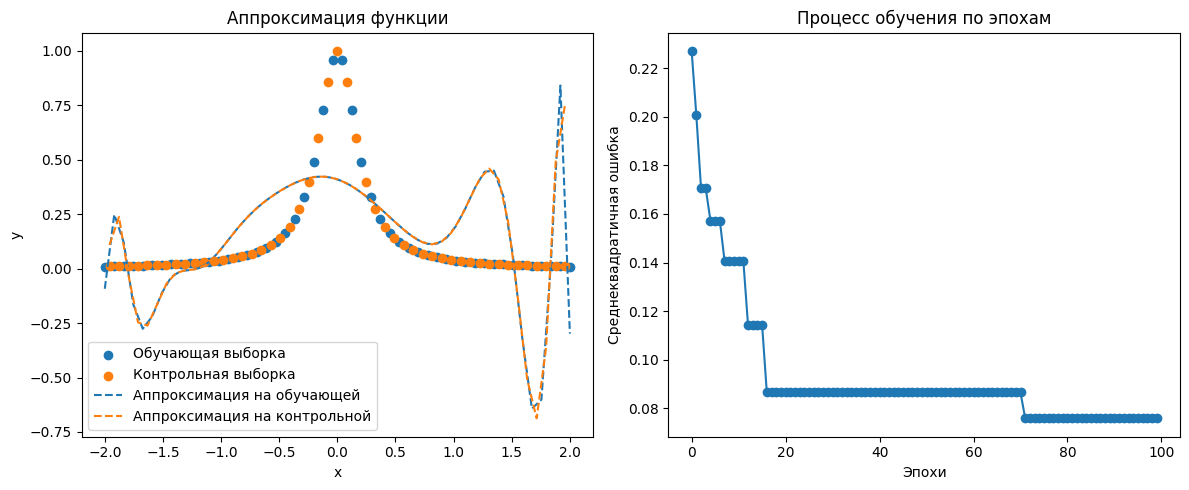

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Определение функции для аппроксимации
def target_function(x):
    return 1 / (1 + 25 * x**2)

# Определение эмпирического риска (MSE)
def empirical_risk(coefficients, x, y):
    y_pred = np.polyval(coefficients, x)
    return np.mean((y - y_pred)**2)

# Обучающая и контрольная выборки
l = 50
x_train = np.array([4 * (i - 1) / (l - 1) - 2 for i in range(1, l + 1)])
x_control = np.array([4 * (i - 0.5) / (l - 1) - 2 for i in range(1, l)])

y_train = target_function(x_train)
y_control = target_function(x_control)

# Настройка генетического алгоритма
def genetic_algorithm_fit(x, y, degree, generations=100, population_size=500):
    def fitness_function(coefficients):
        return empirical_risk(coefficients, x, y)

    best_coefficients = None
    best_fitness = float('inf')
    fitness_history = []

    for _ in range(generations):
        population = [np.random.uniform(-1, 1, degree + 1) for _ in range(population_size)]
        for coefficients in population:
            result = minimize(fitness_function, coefficients, method='BFGS')
            if result.fun < best_fitness:
                best_coefficients = result.x
                best_fitness = result.fun
        fitness_history.append(best_fitness)

    return best_coefficients, fitness_history

# Определение степени полинома
best_degree = 20  # Измените степень в зависимости от вашего анализа

# Обучение и аппроксимация
coefficients, fitness_history = genetic_algorithm_fit(x_train, y_train, best_degree)
y_pred_train = np.polyval(coefficients, x_train)
y_pred_control = np.polyval(coefficients, x_control)

# Визуализация процесса обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label='Обучающая выборка')
plt.scatter(x_control, y_control, label='Контрольная выборка')
plt.plot(x_train, y_pred_train, label='Аппроксимация на обучающей', linestyle='dashed')
plt.plot(x_control, y_pred_control, label='Аппроксимация на контрольной', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(fitness_history)), fitness_history, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Процесс обучения по эпохам')
plt.tight_layout()
plt.show()

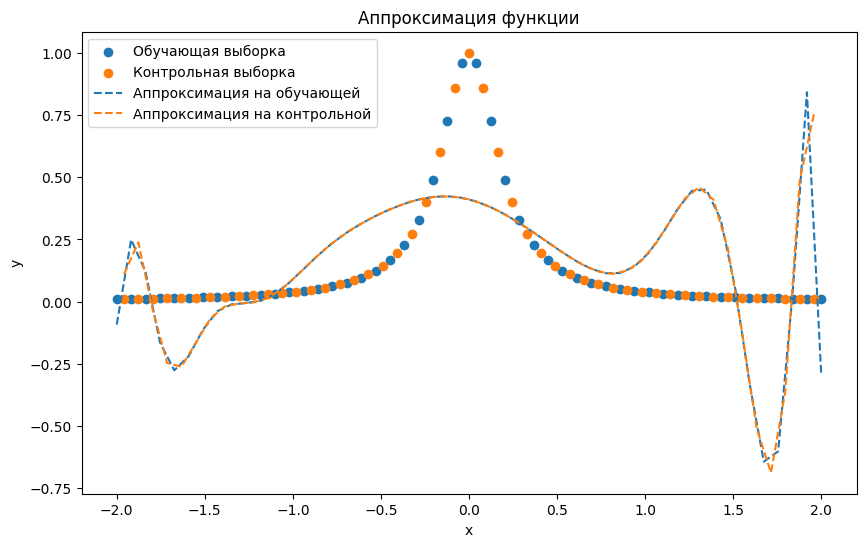

In [2]:

# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Обучающая выборка')
plt.scatter(x_control, y_control, label='Контрольная выборка')
plt.plot(x_train, y_pred_train, label='Аппроксимация на обучающей', linestyle='dashed')
plt.plot(x_control, y_pred_control, label='Аппроксимация на контрольной', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции')
plt.legend()
plt.show()

In [ ]:
for epoch in range(len(fitness_history)):
    coefficients = genetic_algorithm_fit(x_train, y_train, best_degree, generations=epoch+1)[0]
    y_pred_control_epoch = np.polyval(coefficients, x_control)
    plt.plot(x_control, y_pred_control_epoch, label=f'Эпоха {epoch+1}', linestyle='dashed')
plt.scatter(x_control, y_control, label='Контрольная выборка', color='black', marker='plus')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация на контрольной выборке по каждой эпохе')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(range(len(fitness_history)), fitness_history, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Процесс обучения по эпохам')
plt.tight_layout()
plt.show()